# Exploración de archivos

## Archivo Costumer Flight Activity

- 405624 filas y 10 columnas.
- Columnas del df:
    - 0_"Loyalty Number" (int64)  
    - 1_"Year" (int64)  
    - 2_"Month" (int64)  
    - 3_"Flights Booked" (int64)  
    - 4_"Flights with Companions" (int64)  
    - 5_"Total Flights" (int64)  
    - 6_"Distance" (int64)  
    - 7_"Points Accumulated" (float64)
    - 8_"Points Redeemed" (int64)  
    - 9_"Dollar Cost Points Redeemed" (int64)  

- Hay consistencia entre las columnas y los valores que contienen
- Hay consistencia en la forma en la que se nombran las columnas
- Todas las columnas son numéricas, int o float.
- No hay nulos, si filas duplicadas (1864).

Exploramos un poco más en profundidad:
- La columna "Points Accumulated" debe continuar siendo float
- Comparando filas originales con duplicadas ordenadas por "Loyalty Number" vemos que no son duplicadas realmente

Conclusión: entiendo que se crea una entrada por cada cliente que se da de alta en el sistema de fidelización y casi por cada mes y año, pero no siempre esos clientes reservan vuelos, por lo que hay entradas vacías por meses y años, ya que no tienen reservas. Identifico la variable "Total Flights" como una buena forma de filtrar el df para quedarnos con filas que contengan info relevante.

## Archivo Customer Loyalty History 

- 16737 filas y 16 columnas.
- Columnas del df:
    - 0_"Loyalty Number" (int64)  
    - 1_Country (object) 
    - 2_Province  (object) 
    - 3_City  (object) 
    - 4_Postal Code (object) 
    - 5_Gender (object) 
    - 6_Education (object) 
    - 7_Salary (float64)
    - 8_Marital Status  (object) 
    - 9_Loyalty Card  (object) 
    - 10_CLV (float64)
    - 11_Enrollment Type  (object) 
    - 12_Enrollment Year  (int64)  
    - 13_Enrollment Month  (int64)  
    - 14_Cancellation Year  (float64)
    - 15_Cancellation Month (float64)

- Hay consistencia en la forma en la que se nombran las columnas
- Hay consistencia entre las columnas y los valores que contienen
- No hay filas duplicadas 
- Existen columnas con nulos, profundizamos

Exploramos un poco más en profundidad:
- "Salary" tiene un 25% de nulos y todos coinciden con catgoría Education "College", pero más adelante comprobar si es necesario actuar sobre ellos
- "Salary" también tiene valores negativos, pero parace ser fruto de un error, son pocos, cambiar a positivo.
- "Cancellation Year" y "Cancellation Month", tienen nulos pero es esperable, cambiar por ACTIVO o algo similar

Conclusión: En este data frame obtenemos información sobre todos los clientes que en algún momento formaron parte del sistema de fidelización. Puede que ya no estén en activo.

# Union de archivos

### Decido eliminar los duplicados en df_activity antes de unir

De este modo elimino gran cantidad de filas que no me están aportando información y me quedaré solo con los datos que me sirven realmente.


### Union de ambos

pd.merge(df_activity_info, df_history, on="Loyalty Number", how="left") 

Uno de tal manera que se queden todas las filas de df_activity_info y me las complete con los datos de cada cliente que realizó los vuelos.


### Guardar csv

Guardo el archivo como Full Loyalty Program

# Limpieza datos y gestión nulos

- El df contiene El DataFrame tiene 207632 filas y 25 columnas.
- No hay filas duplicadas
- Contiene las siguientes columnas:
    - 0_Loyalty Number 
    - 1_Year 
    - 2_Month 
    - 3_Flights Booked  
    - 4_Flights with Companions 
    - 5_Total Flights 
    - 6_Distance 
    - 7_Points Accumulated 
    - 8_Points Redeemed 
    - 9_Dollar Cost Points Redeemed   
    - 10_Country 
    - 11_Province 
    - 12_City 
    - 13_Postal Code 
    - 14_Gender 
    - 15_Education
    - 16_Salary 
    - 17_Marital Status 
    - 18_Loyalty Card 
    - 19_CLV 
    - 20_Enrollment Type 
    - 21_Enrollment Year   
    - 22_Enrollment Month   
    - 23_Cancellation Year
    - 24_Cancellation Month

## Cancellation Year y Cancellation Month

Creamos una columna nueva que me indique si el cliente está activo o no, y estas las dejamos como están. 

## Salary valores negativos

Sustituimos los valores negativos por valores absolutos

## Salary Nulos

- Los nulos corresponden siempre a los clientes que pertenecen a la categoria "College" en la variable Education. 

- Como es una categoría formativa similar a "Bachellor" y "High School or Below", haremos la mediana.

- Sustituiremos los nulos de esos clientes de categoría "College" por la mediana

## Guardamos un nuevo csv 

Guardamos el archivo como Full Loyalty Program Clean Nonulls

# Análisis

## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Vemos que los meses en los que más vuelos se reservan son los que coinciden con el periódo vacacional:
- sobretodo junio, julio y agosto
- el sigue diciembre 
- y después mayo y marzo

Cuando introducimos la variable año, comparando los meses por año, vemos que la tendencia se mantiene en cuanto a los meses estivos y diciembre, pero que sin embargo, la reserva de vuelos en 2017 a partir del mes de mayo, fue menor respecto al año 2018.

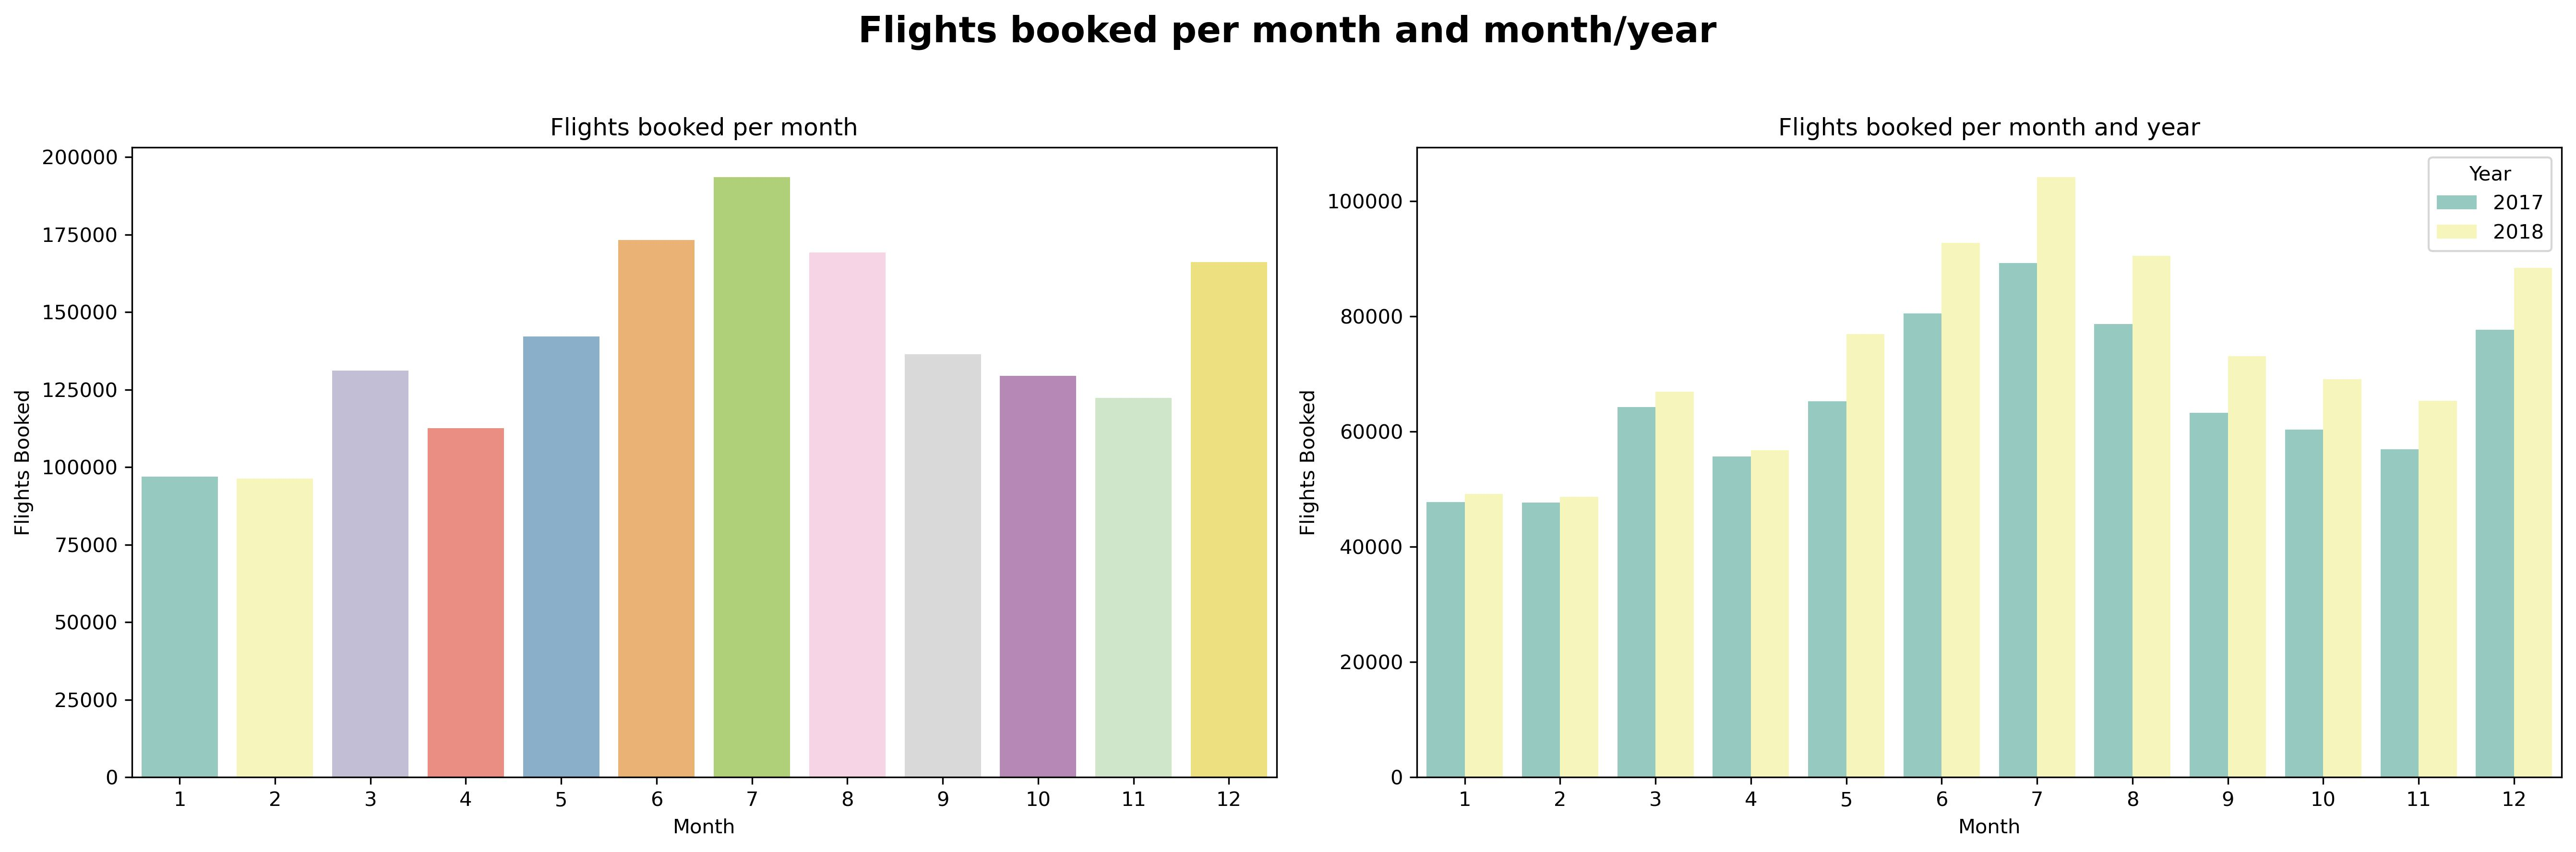

## ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

- Consultando la correlación, podemos ver que existe una alta relacion (0.98) entre las variables "Points Accumulated" y "Distance".

- Mirando el gráfico vemos una clara relación lineal positiva, cuanto más distancia se recorre más puntos se consiguen.

- Y viendo como los datos están distribuidos en cuatro lineas claras, podríamos decir que cuanta más distancia se recorre en menor tiempo, más rápidamente se acumulan los puntos.

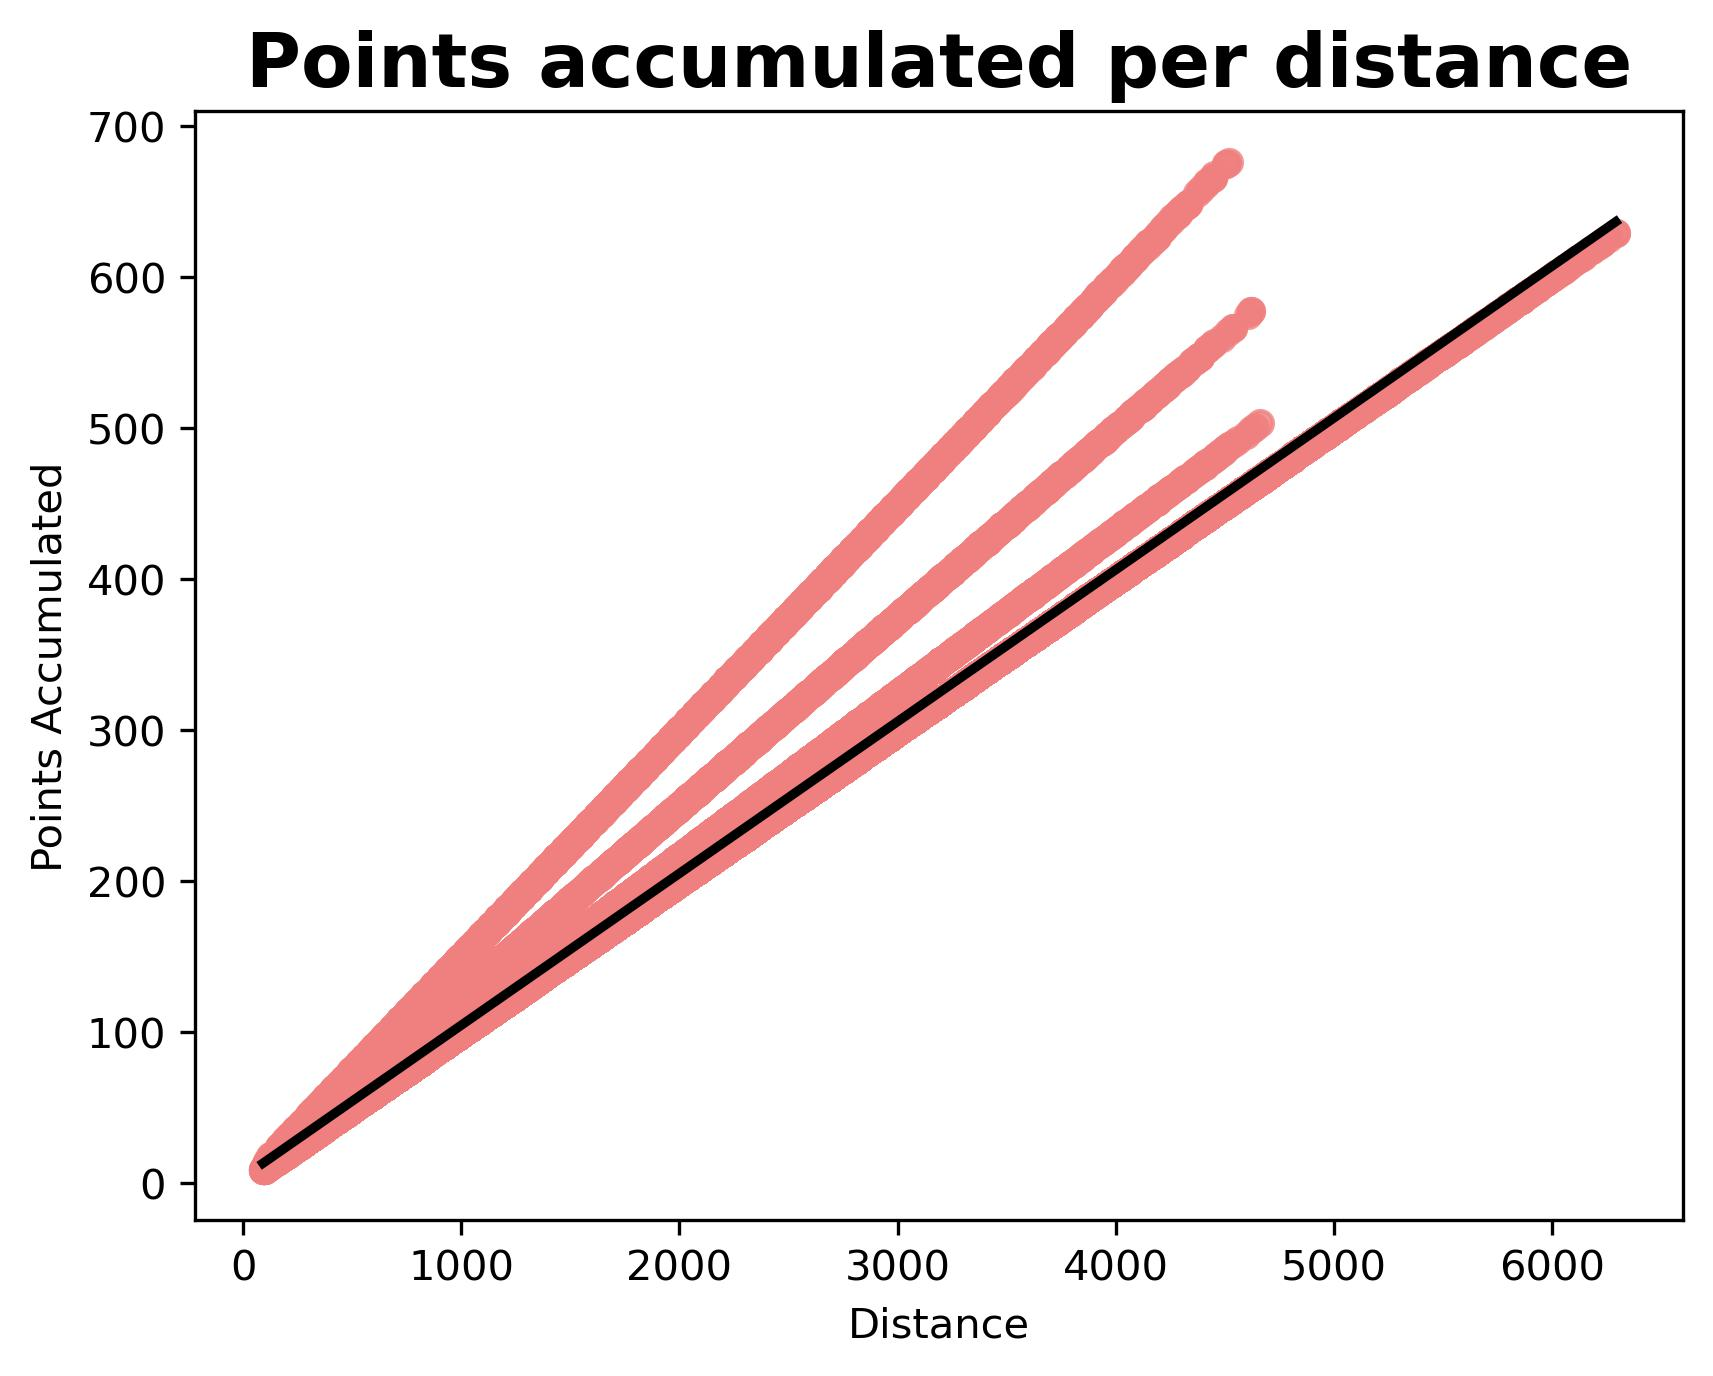

## ¿Cuál es la distribución de los clientes por provincia o estado?

Filtrando el data frame para quedarnos con el cliente una única vez y grupando los clientes por provincia, podemos ver que: 
- Prince Edward Island y Yukon son las provincias con menor número de clientes
- Ontario es la provincia con mayor numero de clientes
- Seguido por British Clumbia y Quebec
- Las tres primeras se diferencian bastante de la cuarta que es Alberta

Cuando trasladamos a una gráfica los datos de actividad por provincia, podemos ver que: 
- Las provincias con mayor actividad también coinciden con las de mayor numero de clientes
- También exite una gran diferencia entre los tres primeros puestos y la cuarta provincia con mayor actividad

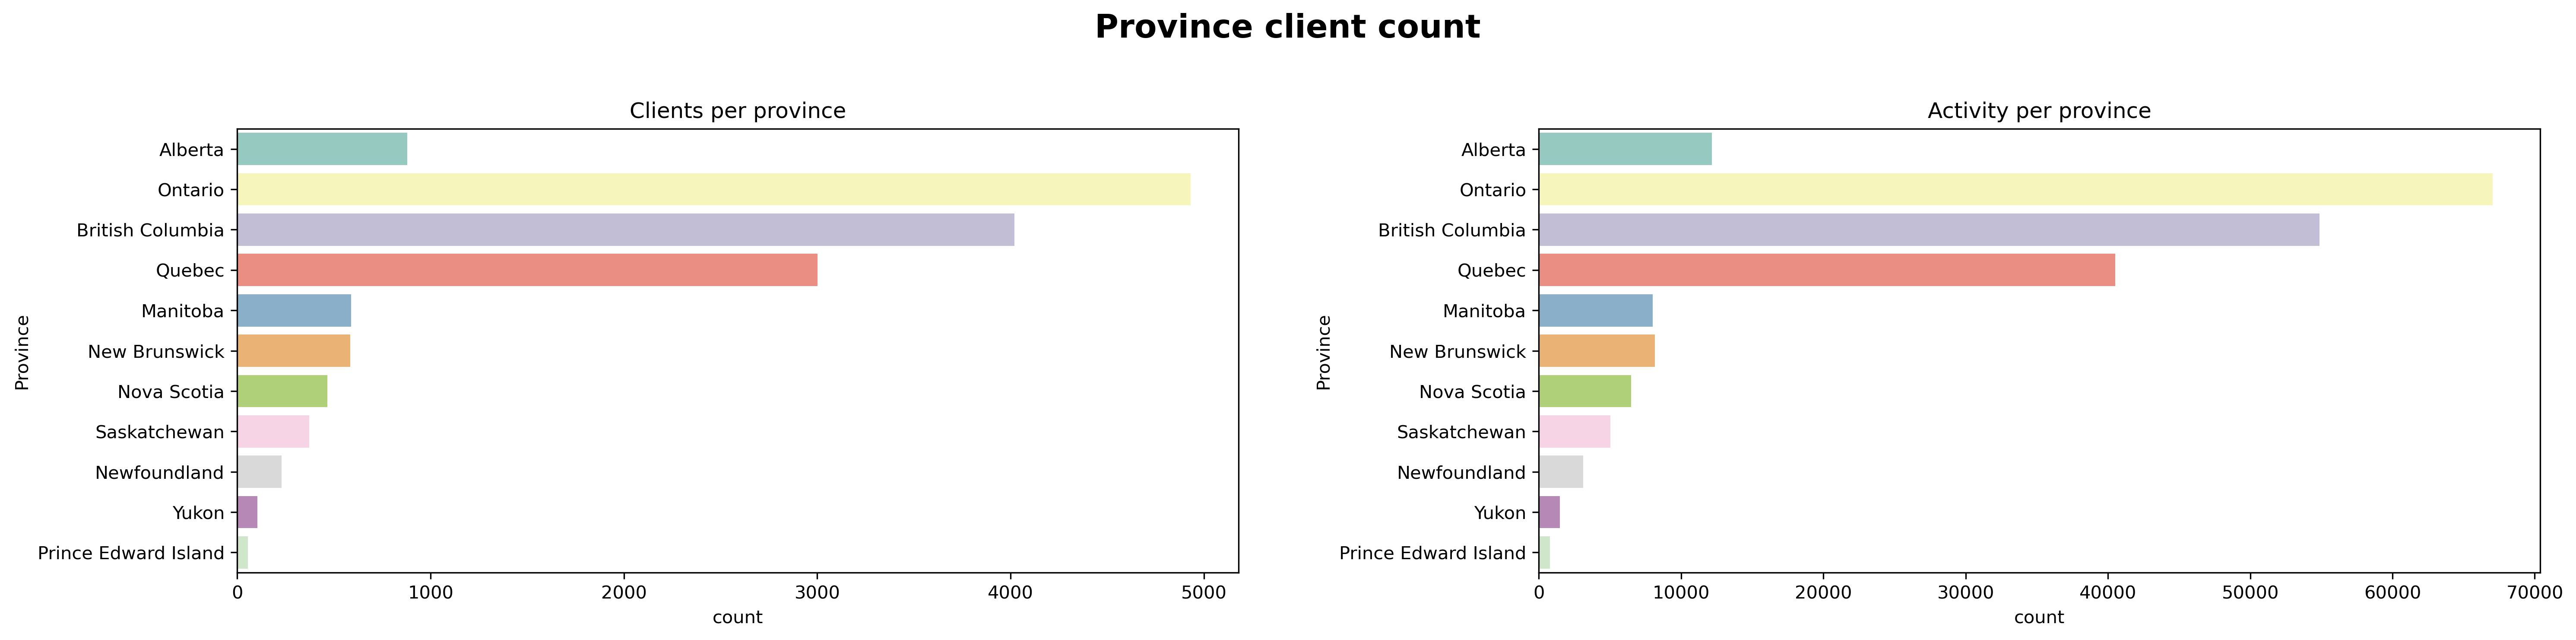

## ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Creamos una gráfica para ver la distribución de clientes según el nivel educativo.

Creamos una gráfica donde se muestre la media de Salary por nivel educativo, en ella podemos ver:
- "Doctor" tiene el salario medio más alto con diferencia respecto al segundo.
- "Master" es el segundo salario medio más alto
- Las demás categorías, tienen un salario medio mucho menor

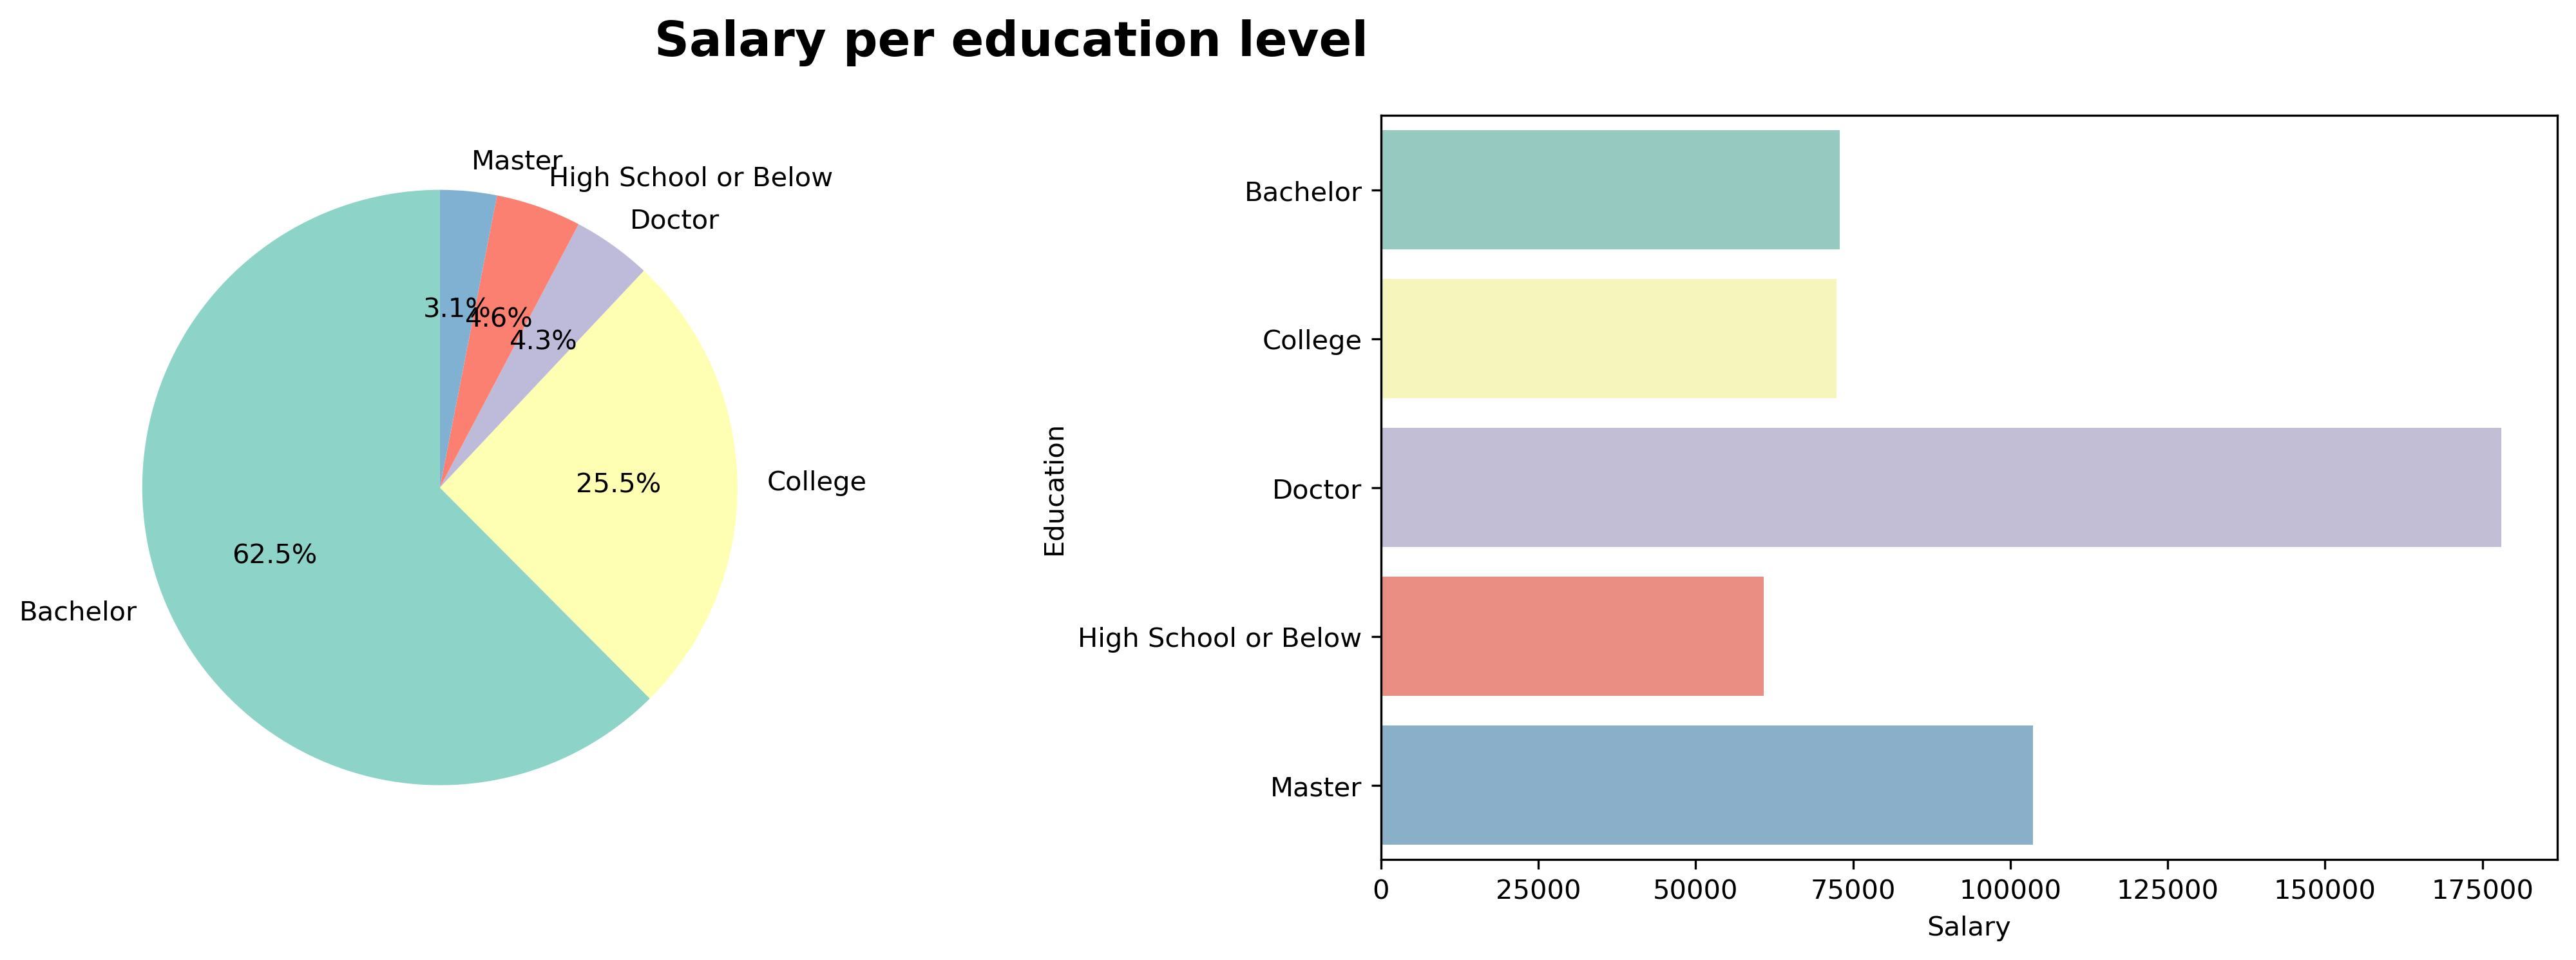

## ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Generamos dos gráficos distinto, 

- Uno para ver el porcentaje de clientes por tipo de carta de fidelidad
- Otro para ver el conteo por tipo de carte de fidelidad

De ello podemos concluir que:

- Star tiene el mayor número de clientes, seguido por Nova
- Aurora es el que tiene menor número de clientes

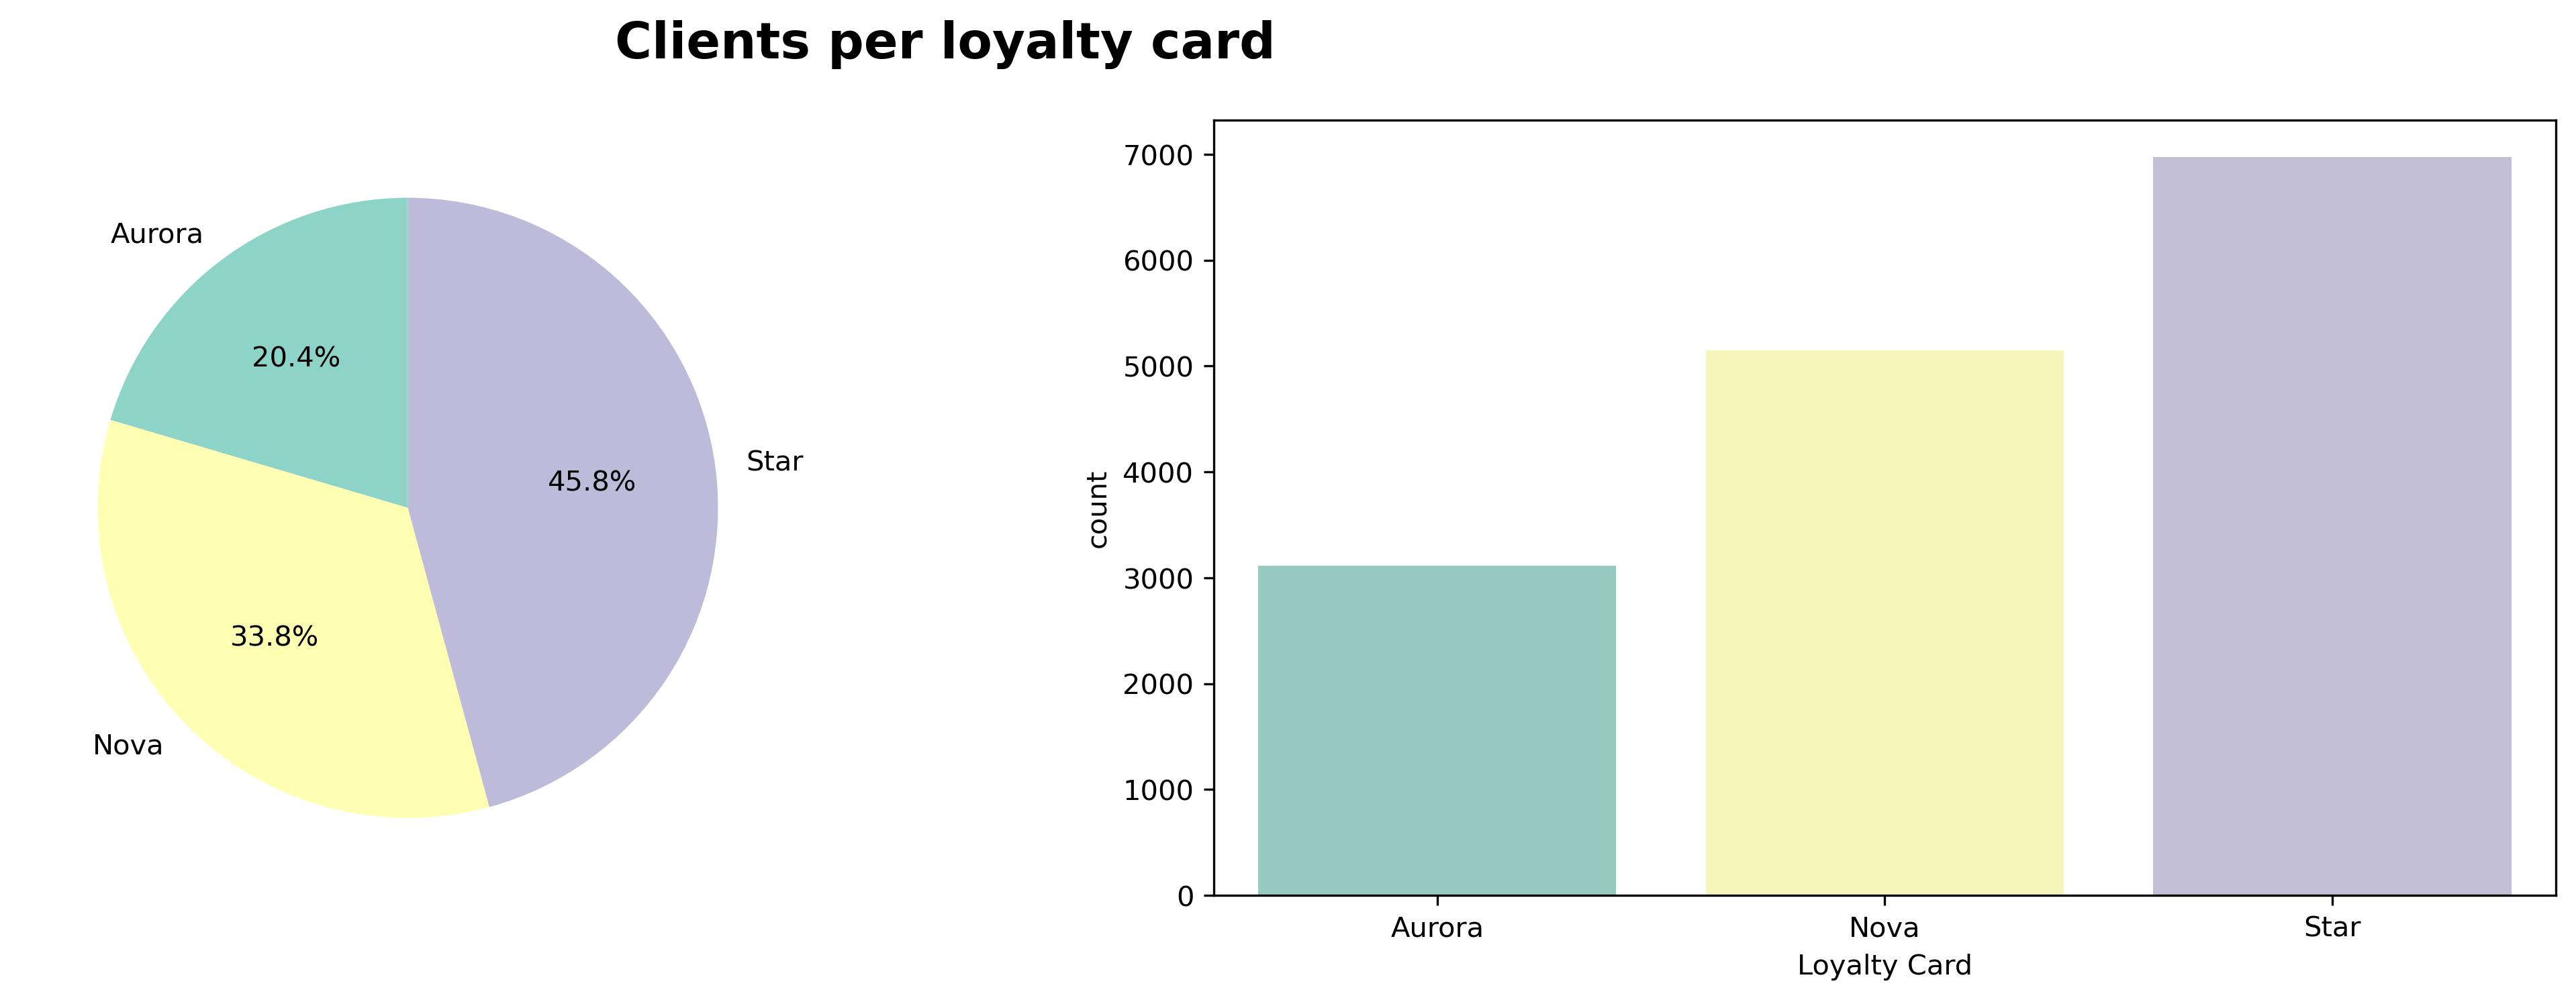

## ¿Cómo se distribuyen los clientes según su estado civil y género?

Generamos tres gráficos:
- Para ver la distribución de los clientes por sexo
- Para ver la distribución de los clientes por estado civil
- Un tercero combiando ambos, sexo y estado civil

De ello concluimos que:
- La proporción de clientes por sexo es similar, ligeramente más alto en mujeres, lo que es normal por la misma proporción que existe en el mundo.
- Casi el 60% de la clientela está casada, el 27% soltera y solo un 15% divorciada.
- Cuando comparamos ambas variables, vemos que el sexo no supone una variable que influya en la distribución de clientes, sin embargo, si podemos ver como la mayoría de los clientes están casados, siendo la proporcion y hombres y mujeres casi igual

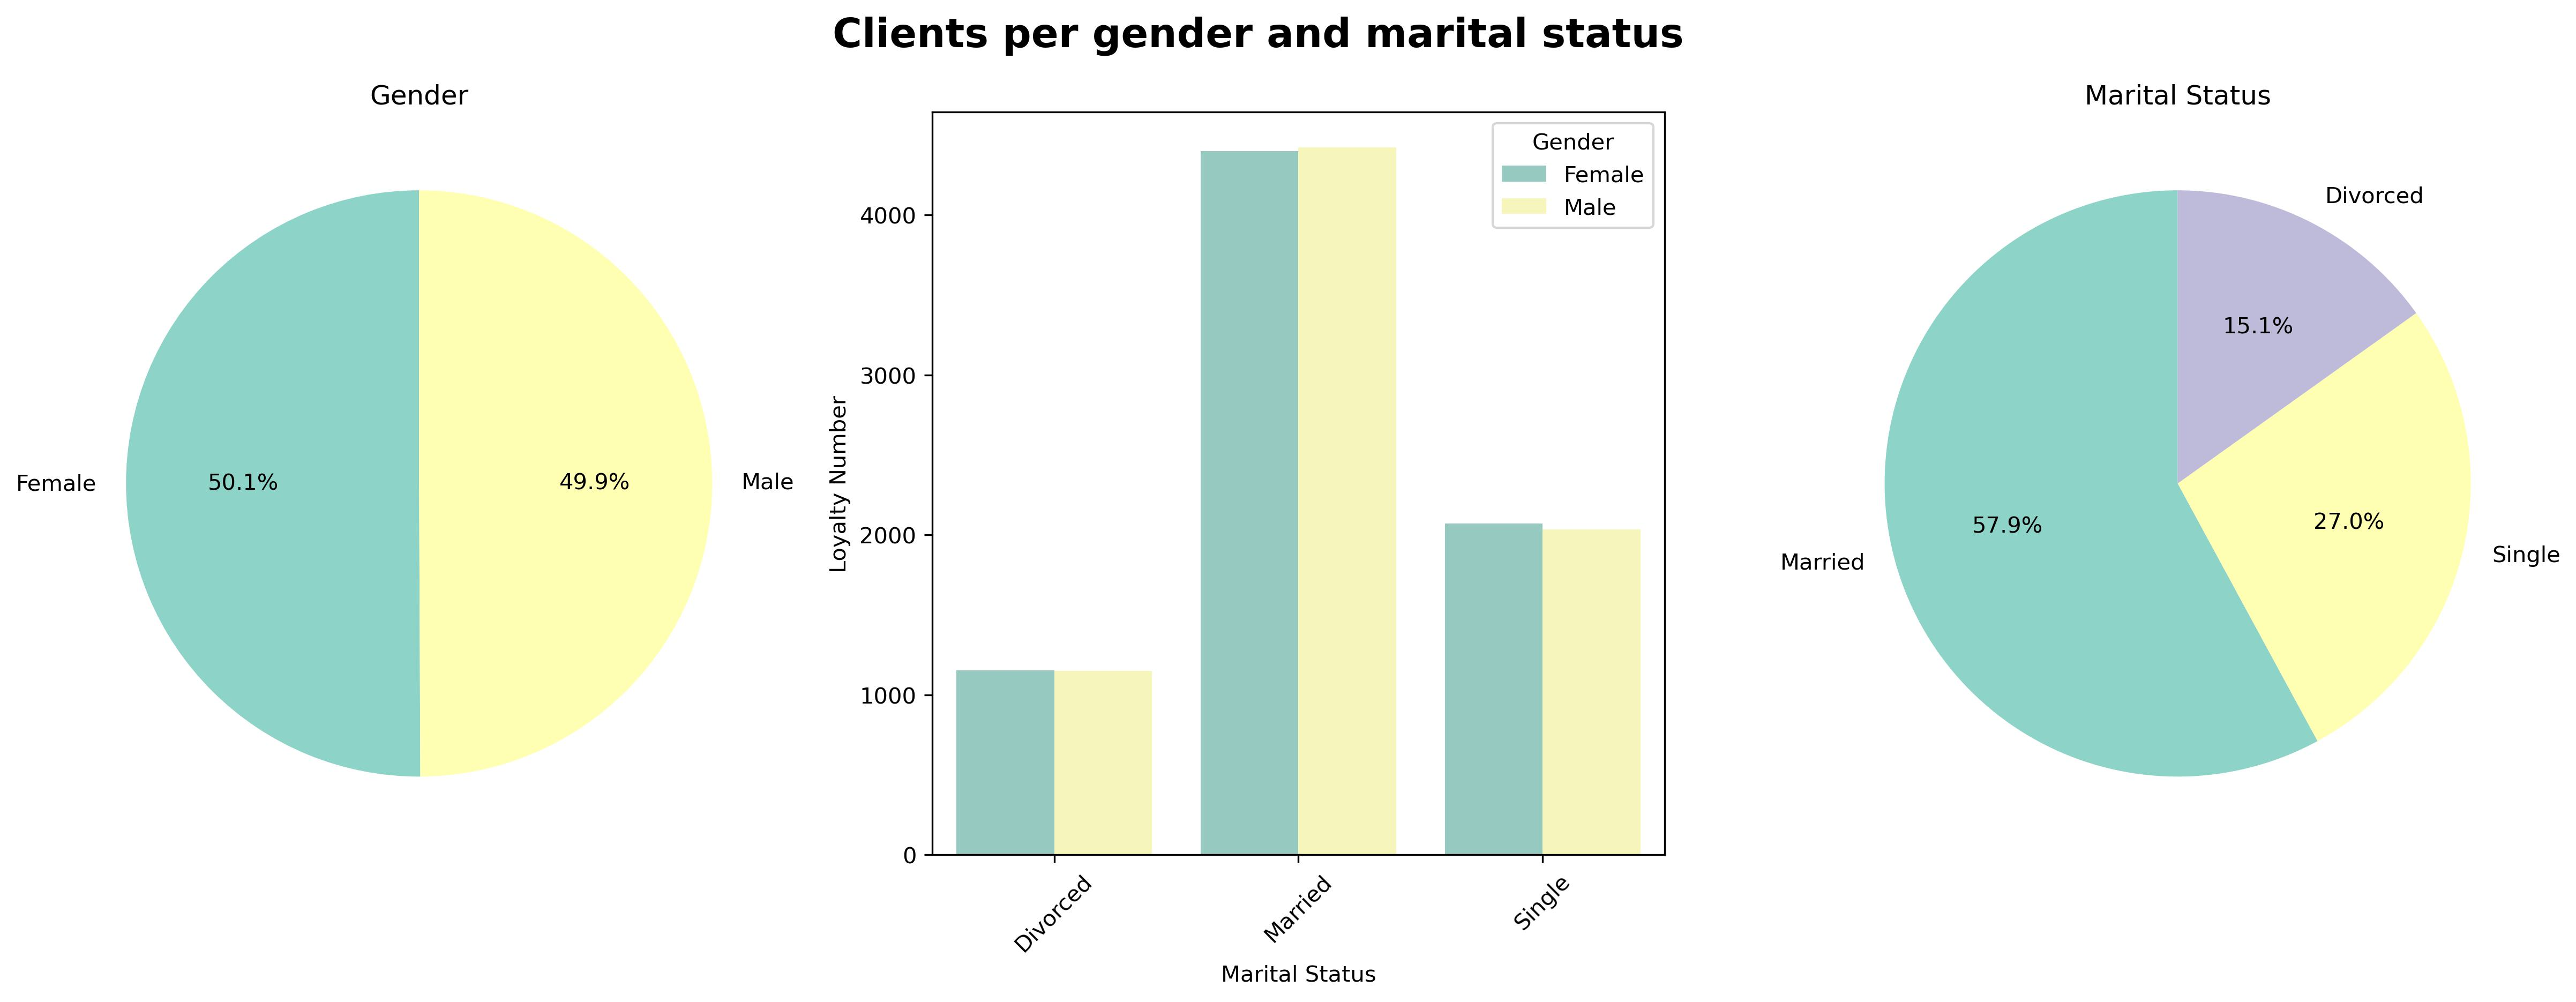

# Conclusiones
#### Estacionalidad en las reservas: 
- Se observa una clara estacionalidad en la reserva de vuelos, con picos en determinados meses del año, lo que puede estar relacionado con periodos vacacionales o promociones específicas.

#### Relación entre distancia y puntos acumulados: 
- Existe una correlación positiva entre la distancia volada y los puntos acumulados, lo que confirma que el sistema de puntos recompensa principalmente la distancia recorrida.

#### Distribución geográfica de los clientes: 
- La mayoría de los clientes se concentran en determinadas provincias, lo que puede ayudar a focalizar campañas de marketing o expandir servicios en zonas menos representadas.

#### Impacto del nivel educativo en el salario: 
- El salario promedio varía según el nivel educativo, siendo más alto en niveles superiores. Esto podría influir en los hábitos de viaje y consumo de los clientes.

#### Preferencia por tipos de tarjetas de fidelidad: 
- Algunas tarjetas son más populares que otras, lo cual podría indicar ventajas percibidas por los clientes o una segmentación adecuada del programa.

#### Diversidad demográfica: 
- La base de clientes muestra diversidad en género y estado civil, lo cual permite diseñar estrategias más inclusivas y personalizadas.

# Recomendaciones y Siguientes Pasos
- Optimizar promociones según la estacionalidad: Aprovechar los meses con menor volumen de vuelos para lanzar campañas de incentivos, ofertas especiales o acumulación extra de puntos.

- Ajustar la estrategia de acumulación de puntos: Dado que los puntos están estrechamente ligados a la distancia, se podrían explorar métodos alternativos para premiar también la frecuencia de vuelos o el gasto total.

- Segmentación geográfica del marketing: Diseñar campañas localizadas en las provincias con mayor densidad de clientes y reforzar la presencia en regiones con baja participación.

- Personalización basada en perfil educativo y económico: Ofrecer beneficios o productos más adaptados a los distintos niveles educativos y salariales de los clientes, mejorando así la experiencia y fidelización.

- Revisión del sistema de tarjetas de fidelidad: Analizar la percepción y valor de cada tipo de tarjeta para asegurar que todas las categorías aporten beneficios claros y diferenciados.

- Análisis más profundo del abandono del programa: Estudiar a los clientes que han cancelado su membresía para identificar patrones y prevenir bajas futuras mediante acciones proactivas.

- Explorar modelos predictivos: Implementar modelos de machine learning para predecir cancelaciones o identificar clientes de alto valor potencial.